# Data Science/ Analytics Intern – Round-0 Assignment

### Part A — Data preparation 

#### 1. Load both datasets and document:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
trades = pd.read_csv("historical_data.csv")
sentiment = pd.read_csv("fear_greed_index.csv")

In [3]:
trades.shape

(211224, 16)

In [4]:
trades.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [5]:
trades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

In [6]:
trades.isnull().sum()

Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
dtype: int64

In [7]:
trades.duplicated().sum()

np.int64(0)

In [8]:
sentiment.shape

(2644, 4)

In [9]:
sentiment.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [10]:
sentiment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB


In [11]:
sentiment.isnull().sum()

timestamp         0
value             0
classification    0
date              0
dtype: int64

In [12]:
sentiment.duplicated().sum()

np.int64(0)

In [13]:
trades.columns

Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp'],
      dtype='object')

In [14]:
sentiment.columns

Index(['timestamp', 'value', 'classification', 'date'], dtype='object')

#### 2. Convert timestamps and align the datasets by date (daily level is fine).


In [15]:
trades['Timestamp IST'] = pd.to_datetime(
    trades['Timestamp IST'],
    format='%d-%m-%Y %H:%M')

In [16]:
trades['date'] = trades['Timestamp IST'].dt.date

In [17]:
sentiment['date'] = pd.to_datetime(sentiment['date']).dt.date

In [18]:
merged = trades.merge(
    sentiment[['date', 'classification']],
    on='date',
    how='left')

In [19]:
merged[['date', 'classification']].head()

,date,classification
0,2024-12-02,Extreme Greed
1,2024-12-02,Extreme Greed
2,2024-12-02,Extreme Greed
3,2024-12-02,Extreme Greed
4,2024-12-02,Extreme Greed


In [20]:
merged['classification'].isnull().sum()

np.int64(6)

In [21]:
merged = merged.dropna(subset=['classification'])

In [22]:
merged['classification'].isnull().sum()

np.int64(0)

In [23]:
merged.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,Extreme Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,Extreme Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02,Extreme Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02,Extreme Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02,Extreme Greed


#### 3. Create the key metrics you will analyze, for example:

In [24]:
daily_pnl = merged.groupby(['Account', 'date'])['Closed PnL'].sum().reset_index()

In [25]:
daily_pnl.head()

,Account,date,Closed PnL
0,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-11,0.0
1,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-17,0.0
2,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-18,0.0
3,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-22,-21227.0
4,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-26,1603.1


In [26]:
trades_per_day = merged.groupby(['Account', 'date']).size().reset_index(name='num_trades')

In [27]:
trades_per_day.head()

,Account,date,num_trades
0,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-11,177
1,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-17,68
2,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-18,40
3,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-22,12
4,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-26,27


In [28]:
merged['win'] = merged['Closed PnL'] > 0

In [29]:
win_rate = merged.groupby('Account')['win'].mean().reset_index()

In [30]:
win_rate.head()

,Account,win
0,0x083384f897ee0f19899168e3b1bec365f52a9012,0.359612
1,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,0.442720
2,0x271b280974205ca63b716753467d5a371de622ab,0.301917
3,0x28736f43f1e871e6aa8b1148d38d4994275d72c4,0.438585
4,0x2c229d22b100a7beb69122eed721cee9b24011dd,0.519914


In [31]:
avg_trade_size = merged.groupby('Account')['Size USD'].mean().reset_index()
avg_trade_size.head()

,Account,Size USD
0,0x083384f897ee0f19899168e3b1bec365f52a9012,16159.576734
1,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,1653.226327
2,0x271b280974205ca63b716753467d5a371de622ab,8893.000898
3,0x28736f43f1e871e6aa8b1148d38d4994275d72c4,507.626933
4,0x2c229d22b100a7beb69122eed721cee9b24011dd,3138.894782


In [32]:
merged['Side'].value_counts()
merged['Direction'].value_counts()

Direction
Open Long                    49895
Close Long                   48678
Open Short                   39741
Close Short                  36007
Sell                         19902
Buy                          16716
Spot Dust Conversion           142
Short > Long                    70
Long > Short                    57
Auto-Deleveraging                8
Liquidated Isolated Short        1
Settlement                       1
Name: count, dtype: int64

In [33]:
open_trades = merged[
    merged['Direction'].isin(['Open Long', 'Open Short'])]

In [34]:
long_short_daily = (
    open_trades
    .groupby(['date', 'Direction'])
    .size()
    .unstack()
    .fillna(0)
)


In [35]:
long_short_daily['long_short_ratio'] = (
    long_short_daily['Open Long'] /
    long_short_daily['Open Short'].replace(0,np.nan)
)


In [36]:
long_short_daily.describe()

Direction,Open Long,Open Short,long_short_ratio
count,450.000000,450.000000,349.000000
mean,110.877778,88.313333,3.213258
std,281.634358,174.748084,11.947273
min,0.000000,0.000000,0.000000
25%,3.000000,1.000000,0.117021
50%,13.000000,12.000000,0.750000
75%,69.500000,102.000000,2.000000
max,3117.000000,1378.000000,126.500000


## Part B — Analysis

In [37]:
daily_total_pnl = (
    merged
    .groupby(['date','classification'])['Closed PnL']
    .sum()
    .reset_index()
)

daily_total_pnl.head()


,date,classification,Closed PnL
0,2023-05-01,Greed,0.000000
1,2023-12-05,Extreme Greed,0.000000
2,2023-12-14,Greed,-205.434737
3,2023-12-15,Greed,-24.632034
4,2023-12-16,Greed,0.000000


In [38]:
daily_total_pnl.groupby('classification')['Closed PnL'].describe()


,count,mean,std,min,25%,50%,75%,max
classification,,,,,,,,
Extreme Fear,14.0,52793.589178,101262.394065,-76880.729036,-838.820628,22561.739636,58201.908546,269328.365917
Extreme Greed,114.0,23817.292199,72827.301581,-127075.399585,586.782411,3127.536297,10985.000642,599151.795008
Fear,91.0,36891.818040,96611.848503,-122672.000883,0.000000,1412.314654,25612.124225,616413.032233
Greed,193.0,11140.566181,62427.957949,-419020.225731,0.000000,678.475928,3263.628824,416876.888120
Neutral,67.0,19297.323516,37995.209071,-10116.875552,0.000000,1818.573295,26554.119208,213860.675308


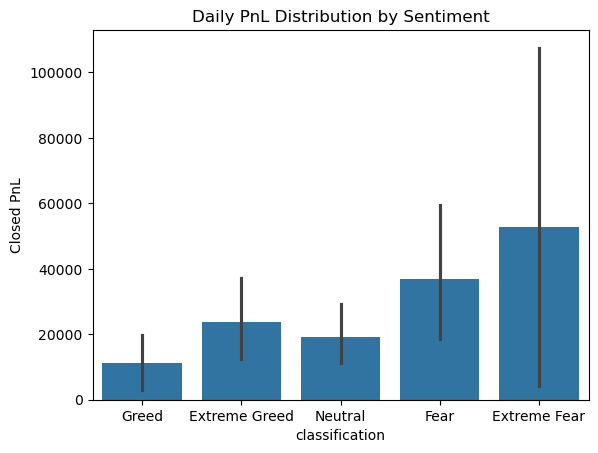

In [39]:
sns.barplot(x='classification',
            y='Closed PnL',
            data=daily_total_pnl)
plt.title("Daily PnL Distribution by Sentiment")
plt.show()


In [40]:
daily_win = (
    merged
    .groupby(['date','classification'])['win']
    .mean()
    .reset_index()
)
daily_win.groupby('classification')['win'].describe()


,count,mean,std,min,25%,50%,75%,max
classification,,,,,,,,
Extreme Fear,14.0,0.327341,0.221273,0.0,0.200387,0.333072,0.425247,0.758434
Extreme Greed,114.0,0.467424,0.261468,0.0,0.283785,0.416805,0.673387,1.000000
Fear,91.0,0.329112,0.253079,0.0,0.136029,0.326622,0.474225,1.000000
Greed,193.0,0.335986,0.255015,0.0,0.128205,0.318408,0.476067,1.000000
Neutral,67.0,0.331886,0.267221,0.0,0.097588,0.333333,0.470053,1.000000


In [41]:
daily_total_pnl.groupby('classification')['Closed PnL'].std()


classification
Extreme Fear     101262.394065
Extreme Greed     72827.301581
Fear              96611.848503
Greed             62427.957949
Neutral           37995.209071
Name: Closed PnL, dtype: float64

#### Yes performance differs between Fear and Greed Days 
Key findings :

1.Daily PnL is significantly higher during Fear and Extreme Fear periods

2.Win rate is relatively stable across most regimes, except Extreme Greed which shows elevated win rate

3.Volatility (drawdown proxy) is highest during Fear regimes, indicating higher risk exposure.

In [42]:
daily_trades = (
    merged
    .groupby(['date','classification'])
    .size()
    .reset_index(name='num_trades')
)

daily_trades.head()


,date,classification,num_trades
0,2023-05-01,Greed,3
1,2023-12-05,Extreme Greed,9
2,2023-12-14,Greed,11
3,2023-12-15,Greed,2
4,2023-12-16,Greed,3


In [43]:
daily_trades.groupby('classification')['num_trades'].describe()


,count,mean,std,min,25%,50%,75%,max
classification,,,,,,,,
Extreme Fear,14.0,1528.571429,1326.865405,9.0,353.00,1097.5,2711.00,3967.0
Extreme Greed,114.0,350.807018,523.133037,3.0,38.25,133.0,410.25,3339.0
Fear,91.0,679.527473,1013.504178,1.0,16.50,88.0,1062.00,6246.0
Greed,193.0,260.637306,638.107475,2.0,15.00,47.0,182.00,6159.0
Neutral,67.0,562.477612,949.632502,2.0,15.00,50.0,890.00,5616.0


In [44]:
daily_size = (
    merged
    .groupby(['date','classification'])['Size USD']
    .mean()
    .reset_index()
)


In [45]:
daily_size.groupby('classification')['Size USD'].describe()


,count,mean,std,min,25%,50%,75%,max
classification,,,,,,,,
Extreme Fear,14.0,4091.804366,2509.288066,574.564299,1920.048389,4236.127510,5438.430114,9405.505196
Extreme Greed,114.0,4410.524482,3441.656951,142.856429,2185.369305,3418.981710,5608.145385,19021.280000
Fear,91.0,6524.294937,6343.206744,0.110000,2022.215062,4186.965333,9217.118903,26512.383826
Greed,193.0,6735.295813,5864.297462,159.000000,2399.111304,5304.975000,9231.120217,28583.181429
Neutral,67.0,7157.527121,6297.817575,80.098421,2247.664991,6000.242000,10285.326507,34988.580000


In [46]:
long_short_daily = long_short_daily.reset_index()

ls_sentiment = long_short_daily.merge(
    sentiment[['date','classification']],
    on='date',
    how='left'
)


In [47]:
ls_sentiment.groupby('classification')['long_short_ratio'].median()

classification
Extreme Fear     1.473856
Extreme Greed    0.666667
Fear             1.250000
Greed            0.500000
Neutral          1.081272
Name: long_short_ratio, dtype: float64

#### Yes traders change behavior based on sentiment
1.Trade frequency increases sharply during Fear regimes, suggesting heightened activity during volatile or uncertain markets.

2.Average trade size does not consistently increase during Greed, indicating that optimism does not necessarily translate to larger position sizes.

3.Long/Short bias reverses expectations Greed, suggesting contrarian behavior. traders are more long during Fear and more short during

In [48]:
trader_activity = (
    merged
    .groupby('Account')
    .size()
    .reset_index(name='total_trades')
)

trader_activity.head()


,Account,total_trades
0,0x083384f897ee0f19899168e3b1bec365f52a9012,3818
1,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,7280
2,0x271b280974205ca63b716753467d5a371de622ab,3809
3,0x28736f43f1e871e6aa8b1148d38d4994275d72c4,13311
4,0x2c229d22b100a7beb69122eed721cee9b24011dd,3239


In [49]:
median_trades = trader_activity['total_trades'].median()
median_trades


3699.0

In [50]:
trader_activity['activity_group'] = np.where(
    trader_activity['total_trades'] > median_trades,
    'Frequent',
    'Infrequent'
)

trader_activity.head()


,Account,total_trades,activity_group
0,0x083384f897ee0f19899168e3b1bec365f52a9012,3818,Frequent
1,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,7280,Frequent
2,0x271b280974205ca63b716753467d5a371de622ab,3809,Frequent
3,0x28736f43f1e871e6aa8b1148d38d4994275d72c4,13311,Frequent
4,0x2c229d22b100a7beb69122eed721cee9b24011dd,3239,Infrequent


In [51]:
merged = merged.merge(
    trader_activity[['Account','activity_group']],
    on='Account',
    how='left'
)

In [52]:
trader_perf = (
    merged
    .groupby('Account')['Closed PnL']
    .mean()
    .reset_index(name='avg_pnl')
)

trader_perf.head()


,Account,avg_pnl
0,0x083384f897ee0f19899168e3b1bec365f52a9012,419.127768
1,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,6.577654
2,0x271b280974205ca63b716753467d5a371de622ab,-18.492043
3,0x28736f43f1e871e6aa8b1148d38d4994275d72c4,9.951530
4,0x2c229d22b100a7beb69122eed721cee9b24011dd,52.071011


In [53]:
trader_perf['consistency_group'] = np.where(
    trader_perf['avg_pnl'] > 0,
    'Consistent Winner',
    'Inconsistent / Losing'
)

trader_perf.head()


,Account,avg_pnl,consistency_group
0,0x083384f897ee0f19899168e3b1bec365f52a9012,419.127768,Consistent Winner
1,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,6.577654,Consistent Winner
2,0x271b280974205ca63b716753467d5a371de622ab,-18.492043,Inconsistent / Losing
3,0x28736f43f1e871e6aa8b1148d38d4994275d72c4,9.951530,Consistent Winner
4,0x2c229d22b100a7beb69122eed721cee9b24011dd,52.071011,Consistent Winner


In [54]:
merged = merged.merge(
    trader_perf[['Account','consistency_group']],
    on='Account',
    how='left'
)

In [55]:
merged.groupby('consistency_group')['win'].mean()

consistency_group
Consistent Winner        0.413782
Inconsistent / Losing    0.355772
Name: win, dtype: float64

In [56]:
merged.groupby('consistency_group').size()

consistency_group
Consistent Winner        201993
Inconsistent / Losing      9225
dtype: int64

#### Key Behavioral and Performance Insights

1. Performance is higher during Fear periods.
Average daily PnL is noticeably higher during Fear and Extreme Fear days compared to Greed days. However, volatility is also much higher in Fear regimes, meaning higher profit potential comes with higher risk.

2. Traders become more active during Fear.
The number of trades per day increases significantly during Fear periods. This suggests traders react more aggressively in uncertain or volatile markets, possibly due to panic or increased opportunity.

3. Directional bias shifts with sentiment.
The long/short ratio shows that traders take more long positions during Fear and relatively more short positions during Greed. This indicates that positioning behavior changes depending on overall market sentiment.

## Part C — “Actionable output”

### Strategy 1: Risk-Adjusted Trading During Fear

Finding:
Daily PnL is higher during Fear and Extreme Fear regimes, but market swings and uncertainty are also significantly higher.

Rule:
Increase participation during Fear regimes, but reduce position size to manage risk.

Rationale:
Fear periods offer stronger profit opportunities, but they also come with larger price swings and higher downside risk. Adjusting position size allows traders to benefit from these conditions while protecting capital.

### Strategy 2: Sentiment-Based Directional Bias

Finding:
The long/short ratio shows that traders take more long positions during Fear and more short positions during Greed.

Rule:
Favor long setups during Fear regimes and reduce long exposure or consider short positions during Greed regimes.

Rationale:
Directional positioning changes across sentiment regimes. Aligning exposure with these shifts can improve trade timing and overall risk management.